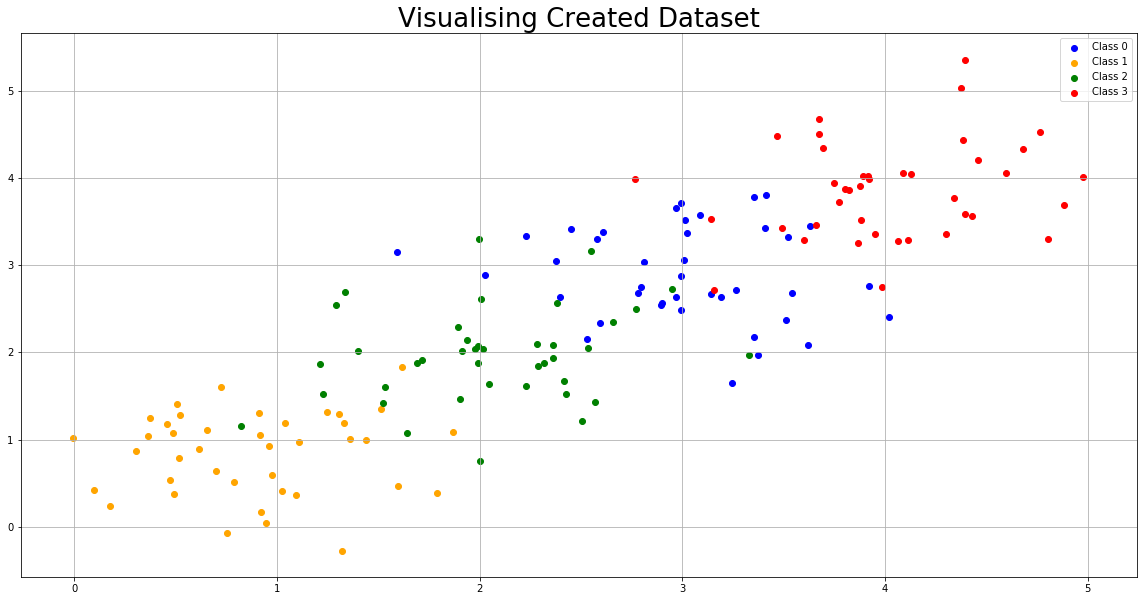

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generate_dataset(no_of_samples_in_class, no_of_classes):
    '''
        Generate dataset based on no of classes and no of 
        samples present in each class.
        
        Parameters:
            Mean for each of the class is a value in (0, 5)
            Std dev for each class is 0.5
    '''
    
    dataset = dict()
    std_dev = 0.5
    
    for index in range(no_of_classes):
        mean = np.random.randint(0, 6)
        dataset[index] = [np.random.normal(mean, std_dev, no_of_samples_in_class),\
                          np.random.normal(mean, std_dev, no_of_samples_in_class)]

    return dataset
    
def visualise_dataset(generated_dataset):
    '''
        Plot the points generated in the generate_dataset
        function.
        
        Plot each of the class with a separate color.
        Each class is visualised as 'Class i'.
    '''
    colors = ['blue', 'orange', 'green', 'red']
    
    plt.title("Visualising Created Dataset", fontdict={'fontsize':26})
    for index in generated_dataset.keys():
        plt.scatter(generated_dataset[index][0], generated_dataset[index][1], c=colors[index], label="Class %i"%index)

    plt.legend(loc='best')
    plt.grid()
       
    '''
        Lambda function to calculate the Euclidean distance 
        from the test point to the target point.
    '''
calculate_euclidean_distance = lambda test_point, target_point : np.sqrt((test_point[0] - target_point[0])**2 + \
                                                                         (test_point[1] - target_point[1])**2)

def k_nearest_neighborhood(test_point, generated_dataset, value_of_k):
    '''
        Implement the k-nearest neighborhood algorithm on 
        the generated_dataset, based on the value_of_k. 
        
        For a point (x, y) in the space of the distributions, 
        calculate the euclidean distance with respect to the
        points in the individual distributions. 
        
        After calculating the distance, find the k closest 
        points to point (x, y). Assign a class to test point
        based on the points closest to a given class. 
    '''
    
    x, y = 0, 1
    
    dist = dict()
    class_values = list()
    classification_result = dict()

    ## Calculate Euclidean distance between test
    ## points and target points, and create a dict.
    for class_val in generated_dataset.keys():
        for index in range(len(generated_dataset[class_val][x])):
            target_point = [generated_dataset[class_val][x][index], \
                            generated_dataset[class_val][y][index]]
            dist[(calculate_euclidean_distance(test_point, target_point))] = class_val

    ## Sort the dict in ascending order, and 
    ## extract 'k' values from it.
    keys_from_dict = (sorted(dist.keys())[0:value_of_k])

    ## Obtain class of these 'k' values.
    for values in keys_from_dict:
        class_values.append(dist[values])

    ## Provide result of classification
    for values in set(class_values):
        classification_result[values] = class_values.count(values)
    
    class_value = max(classification_result, key=lambda value: classification_result[value])
    
    return class_value

def plot_decision_boundaries(generated_dataset, value_of_k):
    '''
        Plot the decision boundaries based on value_of_k,
        given points generated in the space.
    '''
    
    colors = ['blue', 'orange', 'green', 'red']
    max_mean = 5
    min_mean = 0
    std_dev = 0.5
    no_of_points = 50
    
    plt.title("Plot for K = %i"%value_of_k, fontdict={'fontsize':26})
    for point_x in np.linspace(min_mean - 2*std_dev, max_mean + 2*std_dev, no_of_points):
        for point_y in np.linspace(min_mean - 2*std_dev, max_mean + 2*std_dev, no_of_points):
            test_point = [point_x, point_y]
            class_value = k_nearest_neighborhood(test_point, generated_dataset, value_of_k)
            plt.scatter(point_x, point_y, c=colors[class_value])
              
## Parameter definition
no_of_classes = 4
no_of_samples_in_class = 40

generated_dataset = generate_dataset(no_of_samples_in_class, no_of_classes)

figure1 = plt.figure(figsize=(20, 10))
axis = figure1.add_subplot(111)
visualise_dataset(generated_dataset)


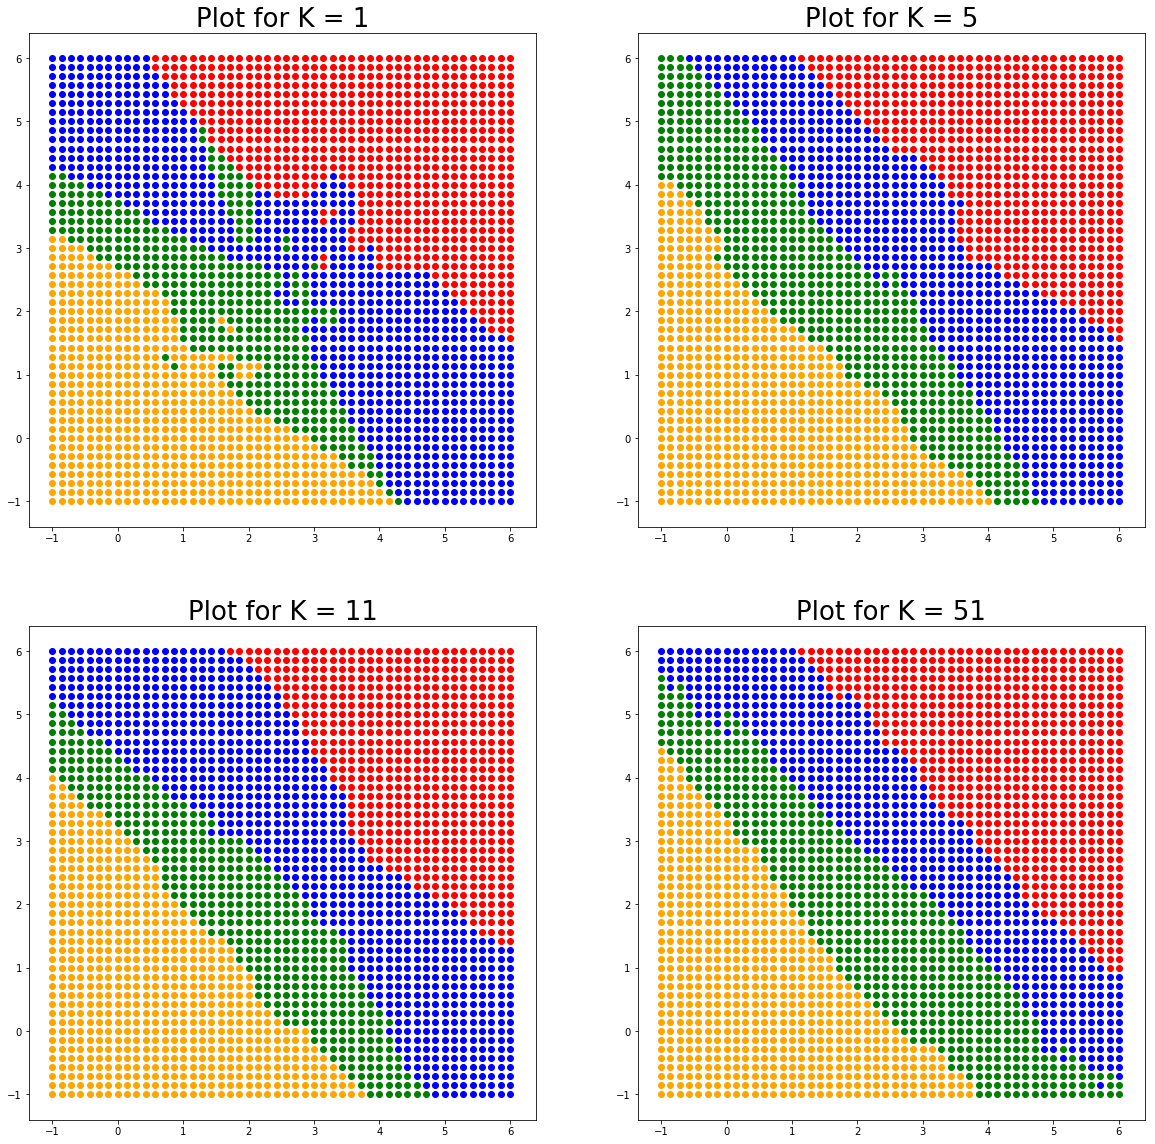

In [2]:
figure2 = plt.figure(figsize=(20, 20))
axis = figure2.add_subplot(221)
plot_decision_boundaries(generated_dataset, 1)

axis = figure2.add_subplot(222)
plot_decision_boundaries(generated_dataset, 5)

axis = figure2.add_subplot(223)
plot_decision_boundaries(generated_dataset, 11)

axis = figure2.add_subplot(224)
plot_decision_boundaries(generated_dataset, 51)